In [66]:
# Actividad 4. Entrenamiento de Red Neuronal Artificial simple.    
# Nombre: Yaros Miroslava Escobedo Hernández  
# Matricula: 1955398 Hora y dia clase: N1 L,M,V

# Importar las librerias de tensorflow y librerias de ayuda
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt


In [67]:
# Importacion del set de datos de MNIST
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) =mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [68]:
class_names = ['cero', 'uno', 'dos', 'tres' ,'cuatro' ,'cinco','seis','siete', 'ocho',  'nueve']
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

# El set de datos debe ser pre-procesada antes de entrenar la red.
# Rango de la gama de color
train_images = train_images / 255.0

test_images = test_images / 255.0

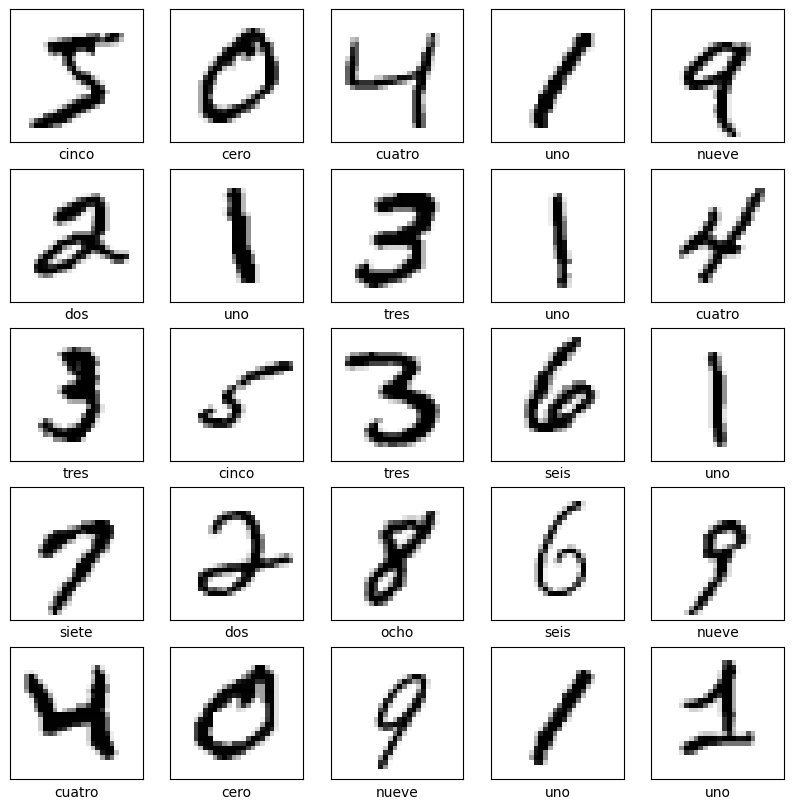

In [69]:
# Se verifica que el set de datos esta en el formato adecuado.
# Se muestran 25 numeros y se despliegan el nombre de cada uno abajo de cada uno.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
     

In [70]:
# Construir el modelo
# Configurar las Capas (Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [71]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
# Entrenar el modelo.
model.fit(train_images, train_labels, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3074 - accuracy: 0.9126
Epoch 2/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2934 - accuracy: 0.9164
Epoch 3/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2821 - accuracy: 0.9188
Epoch 4/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2721 - accuracy: 0.9217
Epoch 5/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2627 - accuracy: 0.9246
Epoch 6/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2539 - accuracy: 0.9271
Epoch 7/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2451 - accuracy: 0.9297
Epoch 8/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2365 - accuracy: 0.9316
Epoch 9/9
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2282 - accuracy: 0.9352


In [75]:
# Se evalua la exactitud
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc) 

313/313 - 0s - loss: 0.2272 - accuracy: 0.9340 - 482ms/epoch - 2ms/step

Test accuracy: 0.9340000152587891


In [76]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

313/313 [==============================] - 1s 2ms/step


7

In [77]:
# Se le pide graficar para poder ver todo el set de la prediccion.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

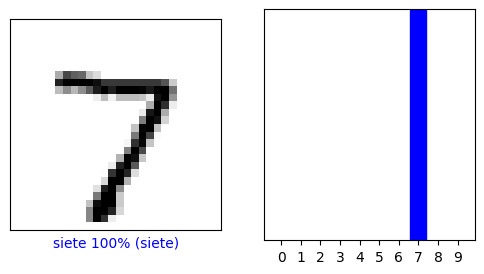

In [78]:
# Ejemplo 1.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

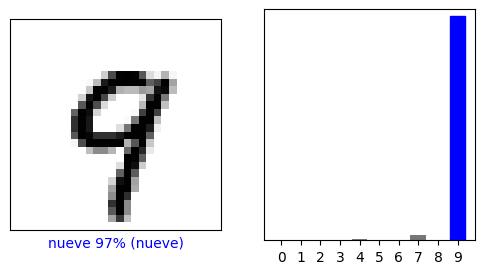

In [79]:
# Ejemplo 2.
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

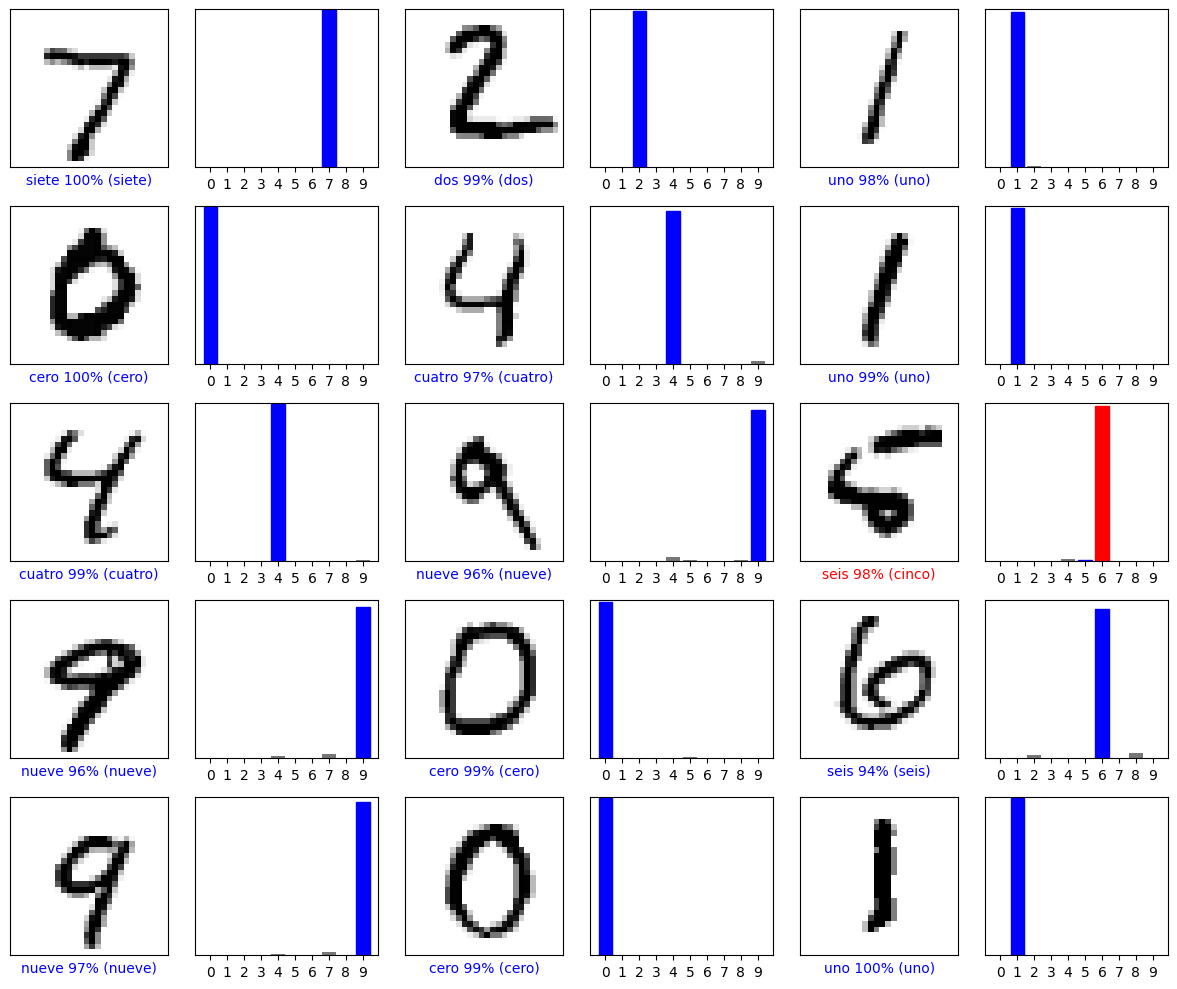

In [81]:
# Se grafican multiples pruebas con sus predicciones para ver el aprendizaje de nuestra red.
# Nuestro analisis arrojo deberia tener una exactitud de 93%
# Color azul: prediccion correcta; color rojo: prediccion incorrecta
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
     